In [2]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

# Loading Data

In [3]:
data = np.genfromtxt('./Dataset.csv', delimiter=',')
print(data[0])

[0.143   0.98493]


In [4]:
x = data[:,0]
y = data[:,1]

print(x[0],y[0])
print(data.shape)

0.143 0.98493
(1000, 2)


In [5]:
x.shape

(1000,)

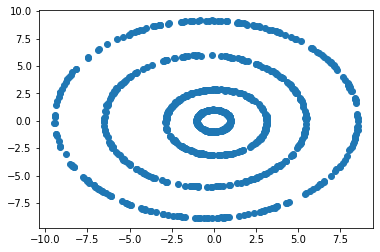

In [6]:
plt.scatter(x,y)

# PCA

In [7]:
# Calculate Mean
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

# Mean Normalize
x_std = (x - x_mean) / x_std
y_std = (y - y_mean) / y_std

# Covariance Matrix
cov_mat = np.cov([x_std,y_std])

print(cov_mat)

[[1.001001   0.05132212]
 [0.05132212 1.001001  ]]


In [8]:
# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(cov_mat)

In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print(40 * '-')
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[1])


----------------------------------------
[-0.70710678 -0.70710678]
[-0.70710678  0.70710678]


In [10]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1), eig_pairs[1][1].reshape(2,1)))
print(40 * '-')
print('Matrix W: \n', matrix_w)

----------------------------------------
Matrix W: 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [11]:
print(matrix_w.shape)
print(x.shape)
print(y.shape)


(2, 2)
(1000,)
(1000,)


In [13]:
features = np.vstack([x_std,y_std])
print(features)
features.shape


[[ 0.03721355 -0.07928601  0.12133462 ...  1.58904894 -1.92818785
  -0.03369538]
 [ 0.23990329  0.24007136 -0.20460953 ... -1.45813149 -1.34465036
  -2.14432818]]


(2, 1000)

In [14]:
transformed = np.dot(matrix_w,features)
print(transformed)

[[-0.1959512  -0.11369241  0.05888425 ... -0.09257262  2.31424609
   1.54009523]
 [ 0.14332329  0.22581976 -0.23047732 ... -2.15468194  0.41262332
  -1.49244277]]


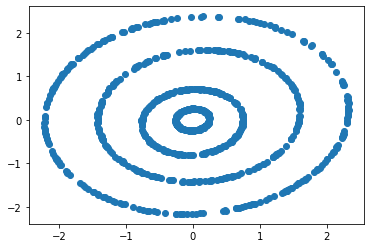

In [17]:
plt.scatter(transformed[0,:],transformed[1,:])
